In [1]:
%load_ext autoreload
from src.utils import VideoInterpTripletsDataset
from src.train import trainGAN
from src.eval import evalGAN
from torch.utils.data import DataLoader
import torch

In [4]:
%autoreload 2

In [3]:
overfitdataset = VideoInterpTripletsDataset('datasets/vids_512/test',read_frames=False)
dataloaderOverfit = DataLoader(overfitdataset,batch_size=32,shuffle=True,num_workers=4)
print(overfitdataset[0]['left'].shape)

torch.Size([3, 288, 512])


In [ ]:
dataset = VideoInterpTripletsDataset('datasets/frames_512/train', read_frames=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

Filenames
['dna', 'ddd', 'baby-dont-stop', 'bad-boy', 'la-vie-en-rose']
Frame read, (h,w) is (288,512)


Video (h,w): (288, 512)
Created models
GPU: Tesla V100-SXM2-16GB
Initialized weights
Set up models
Index for sample: 434


Generated images
Image dtype and mean
torch.float32
tensor(-0.2627)
Mean of image: 93.49933590881339


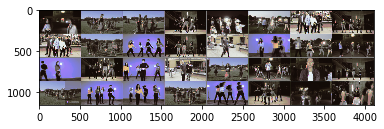

Real images
Image dtype and mean
torch.float32
tensor(-0.2793)
Mean of image: 91.24358166048457


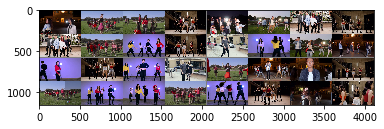


epoch 1 out of 20
D_loss:27.63102149963379, G_loss:2.7739617824554443
G_loss_only:27.63102149963379, S_loss:0.010859526693820953
mean D_pred_real:0.0, mean D_pred_gen:0.0

runtime: 558.7304892539978
./experiments/GS/stats.txt
5
Index for sample: 374


In [ ]:
generator, discriminator = trainGAN(20, dataloader, save_path='./experiments/GS', save_every=5)
# trainGAN(20, dataloader,savePath="./experiments/20_epochs_0.1_lambda",Supervised=True)
# trainGAN(20, dataloaderOverfit,savePath="./experiments/Overfit_20_epochs_0.1_lambda",Supervised=True)

In [ ]:
valset = VideoInterpTripletsDataset('datasets/frames_512/val',read_frames=True)
valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4)

In [ ]:
evalGAN(valloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_val")

In [ ]:
testset = VideoInterpTripletsDataset('datasets/frames_512/test',read_frames=True)
testloader  = DataLoader(testset,batch_size=32,shuffle=True,num_workers=4)

In [ ]:
evalGAN(testloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_test")